In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [3]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# Normalize the data (make everything same scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Try with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [7]:
# Predict test values
y_pred = knn.predict(X_test)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# See confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [8]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K = {k} --> Accuracy: {accuracy_score(y_test, y_pred):.2f}")


K = 1 --> Accuracy: 1.00
K = 2 --> Accuracy: 1.00
K = 3 --> Accuracy: 1.00
K = 4 --> Accuracy: 1.00
K = 5 --> Accuracy: 1.00
K = 6 --> Accuracy: 1.00
K = 7 --> Accuracy: 1.00
K = 8 --> Accuracy: 1.00
K = 9 --> Accuracy: 1.00
K = 10 --> Accuracy: 1.00


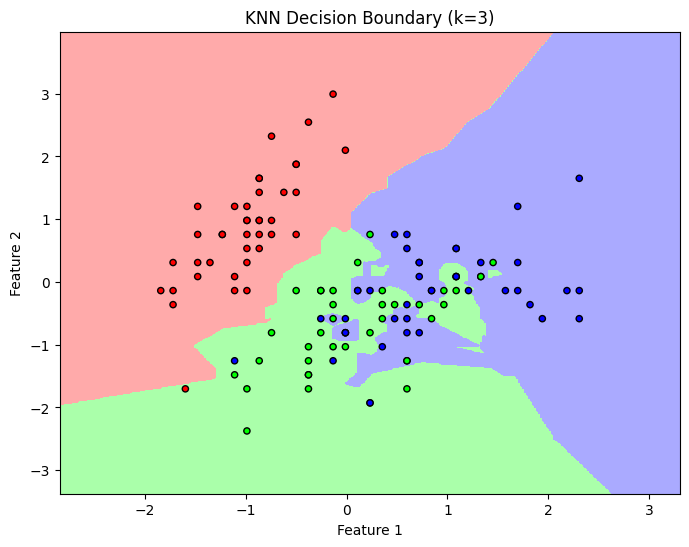

In [9]:
# Use only 2 features for visualization
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

# Train and plot
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_vis, y_train_vis)

# Plotting decision boundary
h = 0.02
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("KNN Decision Boundary (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
